In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plFuns import *

In [2]:
countries=['EN','ES','FR','IT','NL']
seasons=pd.Series({_cntr:Season(_cntr) for _cntr in countries})

manu=seasons['EN'].Teams['Man United']
citeh=seasons['EN'].Teams['Man City']
itstotlads=seasons['EN'].Teams['Tottenham']
chelsea=seasons['EN'].Teams['Chelsea']

In [3]:
seasons['EN'].all

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,E0,2017-08-11,Arsenal,Leicester,4,3,H,2,2,D,...,1.91,1.85,2.10,2.02,1.49,4.73,7.25,NaN,NaN,NaN
1,E0,2017-08-12,Brighton,Man City,0,2,A,0,0,D,...,1.95,1.91,2.01,1.96,11.75,6.15,1.29,NaN,NaN,NaN
2,E0,2017-08-12,Chelsea,Burnley,2,3,A,0,3,A,...,2.03,1.97,1.95,1.90,1.33,5.40,12.25,NaN,NaN,NaN
3,E0,2017-08-12,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,2.10,2.05,1.86,1.83,1.79,3.56,5.51,NaN,NaN,NaN
4,E0,2017-08-12,Everton,Stoke,1,0,H,1,0,H,...,1.94,1.90,2.01,1.98,1.82,3.49,5.42,NaN,NaN,NaN
5,E0,2017-08-12,Southampton,Swansea,0,0,D,0,0,D,...,1.83,1.78,2.16,2.10,1.56,4.25,6.85,NaN,NaN,NaN
6,E0,2017-08-12,Watford,Liverpool,3,3,D,2,1,H,...,1.90,1.84,2.13,2.04,6.88,4.27,1.56,NaN,NaN,NaN
7,E0,2017-08-12,West Brom,Bournemouth,1,0,H,1,0,H,...,2.12,2.08,1.85,1.81,2.65,3.21,3.02,NaN,NaN,NaN
8,E0,2017-08-13,Man United,West Ham,4,0,H,1,0,H,...,2.01,1.96,1.95,1.92,1.31,5.79,12.01,NaN,NaN,NaN
9,E0,2017-08-13,Newcastle,Tottenham,0,2,A,0,0,D,...,2.06,2.00,1.92,1.87,4.82,3.90,1.80,NaN,NaN,NaN


In [4]:
for _season in seasons:
    _season.calibrate()

In [5]:
seasons['EN'].Teams['Man City'].lmbd=0
seasons['EN'].Teams['Man City'].tau=0

In [5]:
for _season in seasons:
    _season.SimulateRestOfSeason(nScenarios=int(1e5))

In [6]:
seasons['EN'].get_all_results()

,Average Goals Against,Average Goals Scored,Average Points,CL,GA,GF,Points,Win,lambda,tau
Man City,25.55,109.10,101.55,100.000,13,64,62,99.954,2.350,0.000
Man United,29.18,76.12,80.78,90.736,16,45,47,0.030,1.445,0.000
Liverpool,40.22,86.43,78.94,84.004,25,50,44,0.009,1.730,0.203
Chelsea,28.91,68.93,78.44,78.773,16,41,46,0.006,1.271,0.000
Tottenham,35.09,72.25,73.79,36.789,21,42,41,0.001,1.376,0.000
Arsenal,45.75,70.54,69.54,9.622,28,40,39,0.000,1.366,0.361
Burnley,31.66,36.89,60.42,0.068,19,19,34,0.000,0.557,0.000
Leicester,53.33,60.36,55.78,0.008,32,34,30,0.000,1.123,0.583
Watford,68.42,55.15,44.87,0.000,40,31,25,0.000,1.005,0.946
Everton,58.23,41.96,44.84,0.000,34,25,27,0.000,0.528,0.700


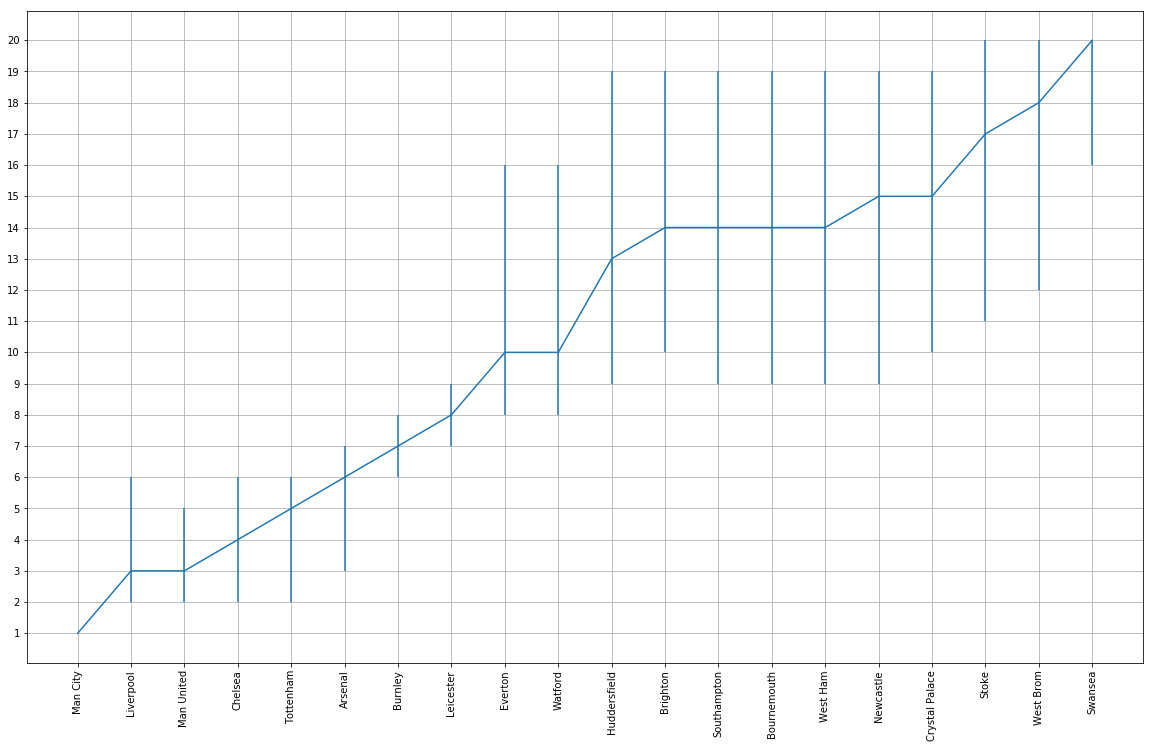

In [7]:
seasons['EN'].conf_int_plot(95,kind='')

In [8]:
manu + citeh

array([ 0.214 ,  0.1784,  0.6076])

In [9]:
manu+chelsea 

array([ 0.4629,  0.2536,  0.2835])

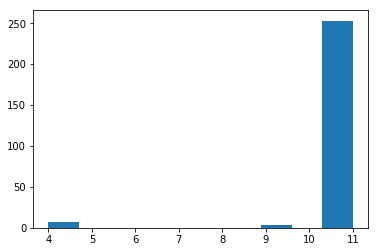

In [36]:
pl=seasons['EN']
plt.hist(pl.PointsPerTeam[:,pl.PointsPerTeam.argmax(axis=0)!=10].argmax(axis=0));